In [135]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [136]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns= 1000

In [137]:
%%capture

#the %%capture makes sure not the whole of last assignment is printed here

#import Dataframes as df


#This imports dataframes from other code.
%run "Dataframes.ipynb"
%run "over_holi.ipynb"


In [138]:
#framedict = df.framedict
framedict.keys()

dict_keys(['Deaths', 'Demographics', 'Age', 'Hospitals', 'Names'])

In [139]:
hosp_frame = framedict['Hospitals']


In [140]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [141]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [142]:
india_s_masters.head()

missingcheck(india_s_masters['censuscode'],641 )

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


0 values are missing.


[]

In [143]:
# We can merge the dataframes on the censuscodes. 
# These codes represent the numbers that were given to the districts
type(india_s_masters["censuscode"])
type(hosp_frame["censuscode"])

pandas.core.series.Series

pandas.core.series.Series

In [144]:
#df.missingcheck(india_s_masters['DT_CEN_CD'],640)

<AxesSubplot:>

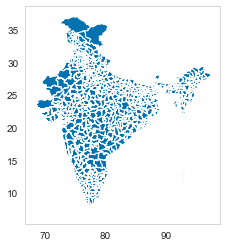

In [145]:
india_s_masters.plot()

In [146]:
##for joining two files
india_joined = india_s_masters.merge(champion,on='censuscode')
india_joined.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share,6mil
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",adilabad,andhra pradesh,28.0,1483347.0,184.00331,303312.000977,0.277341,2741239.0,14897.7700,14.0,1566.7123,85.52240,27.308952,0.0,0.0,0.000000,0.000000,184.003311,0.110648,Population less than 5 million
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",agra,uttar pradesh,9.0,2680510.0,1080.82780,533554.000000,0.458087,4418797.0,4088.3452,16.0,1052.2804,107.98638,25.197544,11831.0,182.0,4.118768,267.742555,1080.827764,0.120746,Population less than 5 million


In [147]:
india_joined.loc[india_joined['ST_NM'] == 'NCT of Delhi']

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share,6mil
372,North West,NCT of Delhi,7,1,90,"POLYGON ((77.17093 28.66833, 77.16689 28.67303...",delhi (north west),NCT of Delhi,NaN,2707855.0,10354.4790,376234.050781,0.941488,3656539.0,353.13599,NaN,NaN,NaN,28.811548,83350.666667,1270.666667,34.750530,2279.496176,10354.478455,0.102893,Population less than 5 million
489,South,NCT of Delhi,7,9,98,"POLYGON ((77.26455 28.60747, 77.26558 28.60738...",delhi (north east),NCT of Delhi,NaN,2078402.0,20443.7970,319397.919907,0.995537,2731929.0,133.63120,NaN,NaN,NaN,27.756417,83350.666667,1270.666667,46.511702,3050.982169,20443.796060,0.116913,Population less than 5 million
492,South West,NCT of Delhi,7,8,97,"POLYGON ((77.18253 28.64817, 77.18380 28.64638...",delhi (south west),NCT of Delhi,NaN,1787689.0,8243.7803,259683.193726,0.937340,2292958.0,278.14401,NaN,NaN,NaN,27.868524,83350.666667,1270.666667,55.416046,3635.071670,8243.779904,0.113252,Population less than 5 million


In [148]:
india_s_masters.loc[india_s_masters['censuscode'] == 518]

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
382,Mumbai Suburban,Maharashtra,27,22,518,"POLYGON ((72.95859 18.98734, 72.94677 18.98574..."


In [149]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [150]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [151]:
champion.columns

Index(['censuscode', 'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000', 'cases per 100.000',
       'population density2', 'slum share', '6mil'],
      dtype='object')

In [186]:
columns_to_plot = champion.columns.values.tolist()
type(columns_to_plot)

for index,value in enumerate(columns_to_plot):
    print(index,value)

len(columns_to_plot)-4

list

0 censuscode
1 Districtname
2 pc11_state_name
3 State id
4 Literacy
5 population density
6 slum population
7 Urban population share
8 population
9 pc11_tot_area
10 Beds (IC)
11 Beds (total)
12 Care facilities (hospitals/clinics)
13 average_age
14 total_cases
15 total_deaths
16 deaths per 100.000
17 cases per 100.000
18 population density2
19 slum share
20 6mil


17

In [187]:
# This code removes unneeded variables
#if len(columns_to_plot) != 16:
columns_to_plot = columns_to_plot[4:-1] 
len(columns_to_plot)
for index,value in enumerate(columns_to_plot):
    print(index,value)

columns_to_plot

16

0 Literacy
1 population density
2 slum population
3 Urban population share
4 population
5 pc11_tot_area
6 Beds (IC)
7 Beds (total)
8 Care facilities (hospitals/clinics)
9 average_age
10 total_cases
11 total_deaths
12 deaths per 100.000
13 cases per 100.000
14 population density2
15 slum share


['Literacy',
 'population density',
 'slum population',
 'Urban population share',
 'population',
 'pc11_tot_area',
 'Beds (IC)',
 'Beds (total)',
 'Care facilities (hospitals/clinics)',
 'average_age',
 'total_cases',
 'total_deaths',
 'deaths per 100.000',
 'cases per 100.000',
 'population density2',
 'slum share']

Text(0.5, 1.0, 'Urban population share')

Text(0.5, 1.0, 'average_age')

Text(0.5, 1.0, 'deaths per 100.000')

Text(0.5, 1.0, 'cases per 100.000')

Text(0.5, 1.0, 'slum share')

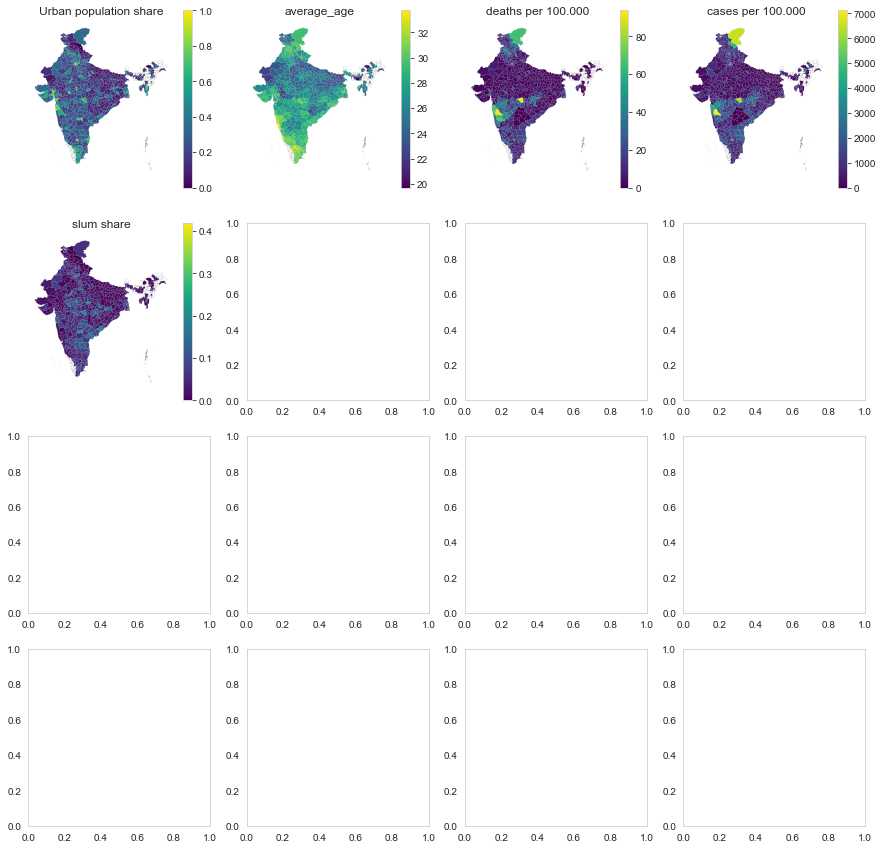

In [188]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

columns_to_plot =  ['Urban population share', 'average_age',
                    'deaths per 100.000', 'cases per 100.000', 
                    'slum share']

columns_to_standardize = ['Literacy', 'population density', 'slum population', 
                          'population', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)', 
                          'Care facilities (hospitals/clinics)']

for i, col in enumerate(columns_to_plot): # hier dus columns_to_plot gebruiken
    ax = axs[i]
    plot = india_s_masters.plot(ax = ax, linewidth=0.1, alpha = 1, color = 'white', edgecolor="grey")
    plot = india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1, legend= True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

<AxesSubplot:xlabel='population density2', ylabel='censuscode'>

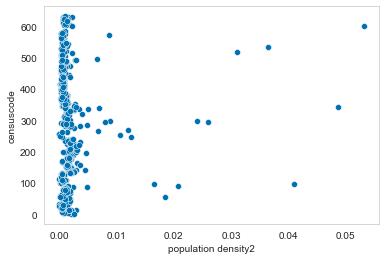

In [155]:
# india_joined['population density2'].sort_values(ascending = False)
popnorm = (india_joined['population density2']/india_joined['population density2'].sum())

sns.scatterplot(x = popnorm , y = india_joined['censuscode'])

In [156]:
column = ['cases per 100.000','deaths per 100.000']

,censuscode,cases per 100.000,deaths per 100.000
0,532,0.000000,0.000000
1,146,267.742555,4.118768
2,474,1208.467534,34.512628
3,522,2619.520910,29.120707
4,283,777.399459,2.747877
...,...,...,...
556,108,199.692861,2.096513
557,240,391.100432,1.712224
558,239,498.083644,2.577061
559,618,644.808067,9.279594


C:\Users\danie\AppData\Local\Temp/ipykernel_5140/2723395961.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
C:\Users\danie\AppData\Local\Temp/ipykernel_5140/2723395961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)


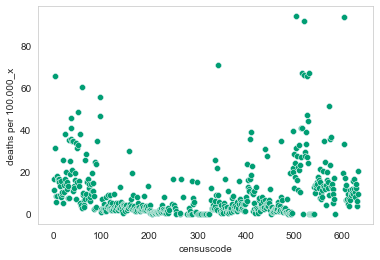

In [157]:
selection = india_joined[['censuscode','cases per 100.000','deaths per 100.000']]
#india_joined
#for some reason, this k cant be bigger than 20
k = 10
klist = list(range(1,k+1,1))
selection
selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)

test = pd.merge(india_joined, selection, how = 'right', on = 'censuscode')
test = pd.merge(test, over_holi, how = 'right', on = 'censuscode')


#these hist plots show crazy outliers
scat = sns.scatterplot(data = test[['deaths per 100.000_x','censuscode']].sort_values(by = 'deaths per 100.000_x', ascending = False), x=test['censuscode'],y=test['deaths per 100.000_x'])
scat = sns.scatterplot(data = test[['cases per 100.000_x','censuscode']].sort_values(by = 'cases per 100.000_x', ascending = False), x=test['censuscode'],y=test['deaths per 100.000_x'])


test = test[test['deaths per 100.000_x'] < 20000]
test = test[test['cases per 100.000_x'] < 20000]

#test[['deaths per 100.000','cases per 100.000']]


#test[['deaths per 100.000_x','censuscode']].sort_values(by = 'deaths per 100.000_x', ascending = False)

In [158]:
print(test['cases per 100.000_x'].sort_values(ascending = False))

464    7120.553061
2      6521.234277
449    6386.451692
530    5802.228319
515    5132.945821
          ...     
481       0.000000
482       0.000000
483       0.000000
484       0.000000
265       0.000000
Name: cases per 100.000_x, Length: 561, dtype: float64


In [159]:
test.keys()

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode', 'geometry',
       'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population_x', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000_x', 'cases per 100.000_x',
       'population density2', 'slum share', '6mil', 'cases per 100.000_y',
       'deaths per 100.000_y', 'perc cases', 'perc deaths', 'over_holi cases',
       'over_holi deaths', 'population_y', 'over_holi cases per 100.000',
       'over_holi deaths per 100.000'],
      dtype='object')

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode', 'geometry',
       'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population_x', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000_x', 'cases per 100.000_x',
       'population density2', 'slum share', '6mil', 'cases per 100.000_y',
       'deaths per 100.000_y', 'perc cases', 'perc deaths', 'over_holi cases',
       'over_holi deaths', 'population_y', 'over_holi cases per 100.000',
       'over_holi deaths per 100.000'],
      dtype='object')

Text(0.5, 1.0, 'cases per 100.000_x')

Text(0.5, 1.0, 'deaths per 100.000_x')

Text(0.5, 1.0, 'over_holi cases')

Text(0.5, 1.0, 'over_holi deaths')

Text(0.5, 1.0, 'over_holi cases per 100.000')

Text(0.5, 1.0, 'over_holi deaths per 100.000')

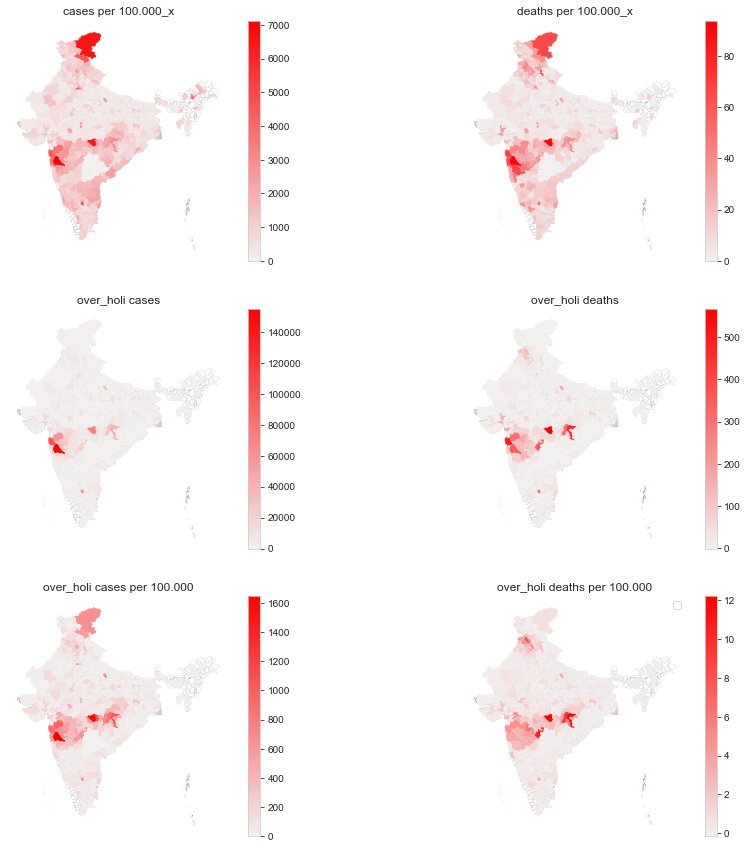

In [160]:
columns_to_plot2 = ['perc cases','perc deaths']
columns_to_plot3 = ['cases per 100.000_x', 'deaths per 100.000_x', 'over_holi cases', 'over_holi deaths',
                    'over_holi cases per 100.000', 'over_holi deaths per 100.000']

test.keys()

f, axs = plt.subplots(3,2, figsize=(15,15))
axs = axs.flatten()


for i, col in enumerate(columns_to_plot3):
    ax = axs[i]
    cmap = sns.color_palette("light:r", as_cmap=True)
    plot = india_s_masters.plot(ax = ax, linewidth=0.1, alpha = 1, color = 'white', edgecolor="grey")
    plot = test.plot(column=col, ax=ax, linewidth=0, cmap=cmap, alpha = 1, legend = True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plot = plt.legend(labels=klist)
plt.show()

In [161]:
india_joined.keys()

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode', 'geometry',
       'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000', 'cases per 100.000',
       'population density2', 'slum share', '6mil'],
      dtype='object')

In [280]:
# Creating a scaler so that all variables are on the same scale
scaler = MinMaxScaler()

columns_to_plot


['Urban population share',
 'average_age',
 'slum share',
 'over_holi cases per 100.000',
 'over_holi deaths per 100.000']

In [281]:
#adding over holi data
india_joined = pd.merge(india_joined, over_holi, on = 'censuscode', how = 'right')
columns_to_plot = ['Urban population share', 'average_age', 'slum share', 'over_holi cases per 100.000', 'over_holi deaths per 100.000']
india_joined[columns_to_plot]


C:\Users\danie\AppData\Local\Temp/ipykernel_5140/954366613.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'population_x'} in the result is deprecated and will raise a MergeError in a future version.
  india_joined = pd.merge(india_joined, over_holi, on = 'censuscode', how = 'right')


,Urban population share,average_age,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
0,0.120329,23.130876,0.023525,30.562277,0.114896
1,0.129901,22.392261,0.049899,70.713570,0.398013
2,0.342138,29.451669,0.058155,656.992816,0.749137
3,0.116035,24.916550,0.000000,38.351728,0.000000
4,0.081013,23.933174,0.000000,9.856659,0.419432
...,...,...,...,...,...
556,0.823259,32.183590,0.013040,44.483082,0.160396
557,0.173151,28.769908,0.031931,29.001031,0.000000
558,0.227876,28.080297,0.013859,49.685899,0.000000
559,0.757347,32.493332,0.075775,175.272444,0.318099


In [282]:
print(scaler.fit(india_joined[columns_to_plot]))
#selecteren welke data we willen scalen, strings kunnen bv niet

MinMaxScaler()


In [283]:
#creating Dataframe with scaled data
india_scaled = (scaler.transform(india_joined[columns_to_plot]))
len(india_scaled)

561

In [284]:
# Renaming the column headers
india_scaled = pd.DataFrame(india_scaled, columns= india_joined[columns_to_plot].columns)
india_scaled

,Urban population share,average_age,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
0,0.120329,0.243912,0.056220,0.018596,0.022355
1,0.129901,0.191238,0.119247,0.043027,0.045247
2,0.342138,0.694680,0.138979,0.399756,0.073638
3,0.116035,0.371257,0.000000,0.023336,0.013064
4,0.081013,0.301128,0.000000,0.005997,0.046979
...,...,...,...,...,...
556,0.823259,0.889507,0.031163,0.027066,0.026034
557,0.173151,0.646060,0.076308,0.017646,0.013064
558,0.227876,0.596880,0.033121,0.030232,0.013064
559,0.757347,0.911597,0.181086,0.106647,0.038785


In [285]:
india_scaled[columns_to_plot] #wtf gaat hier mis

,Urban population share,average_age,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
0,0.120329,0.243912,0.056220,0.018596,0.022355
1,0.129901,0.191238,0.119247,0.043027,0.045247
2,0.342138,0.694680,0.138979,0.399756,0.073638
3,0.116035,0.371257,0.000000,0.023336,0.013064
4,0.081013,0.301128,0.000000,0.005997,0.046979
...,...,...,...,...,...
556,0.823259,0.889507,0.031163,0.027066,0.026034
557,0.173151,0.646060,0.076308,0.017646,0.013064
558,0.227876,0.596880,0.033121,0.030232,0.013064
559,0.757347,0.911597,0.181086,0.106647,0.038785


In [286]:
india_joined.sort_values('deaths per 100.000', ascending = False).head(10)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population_x,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share,6mil,over_holi cases_x,over_holi deaths_x,population_y,over_holi cases per 100.000_x,over_holi deaths per 100.000_x,Literacy %,kmeans_3,kmeans_5,kmeans_7,kmeans_9,over_holi cases_y,over_holi deaths_y,population_x,over_holi cases per 100.000_y,over_holi deaths per 100.000_y,over_holi cases,over_holi deaths,population_y,over_holi cases per 100.000,over_holi deaths per 100.000
449,Nagpur,Maharashtra,27,9,505,"POLYGON ((79.51189 21.58940, 79.51674 21.58231...",nagpur,maharashtra,27.0,3673808.0,535.14478,959885.0,0.683080,4653570.0,8695.90820,31.0,2773.26950,132.473080,29.494594,297198.0,4361.0,93.712999,6386.451692,535.144794,0.206269,Population less than 5 million,74585.0,568.0,4653570.0,1602.747998,12.205683,78.946013,1,1,4,5,74585.0,568.0,4653570.0,1602.747998,12.205683,74585.0,568.0,4653570.0,1602.747998,12.205683
530,Chennai,Tamil Nadu,33,2,603,"POLYGON ((80.29769 13.12548, 80.29798 13.11914...",chennai,tamil nadu,33.0,3776276.0,26552.75400,1342337.0,1.000000,4646732.0,175.00000,NaN,NaN,NaN,31.406187,269614.0,4334.0,93.269851,5802.228319,26552.754286,0.288878,Population less than 5 million,23275.0,107.0,4646732.0,500.889658,2.302694,81.267351,1,1,4,2,23275.0,107.0,4646732.0,500.889658,2.302694,23275.0,107.0,4646732.0,500.889658,2.302694
464,Pune,Maharashtra,27,25,521,"POLYGON ((74.83388 18.33920, 74.83266 18.32908...",pune,maharashtra,27.0,7171723.0,570.39642,865248.0,0.609920,9429408.0,16531.32400,22.0,2043.05880,231.666350,28.464921,671426.0,8629.0,91.511577,7120.553061,570.396418,0.091761,Population more than 5 million,154971.0,349.0,9429408.0,1643.485996,3.701187,76.056980,1,1,4,5,154971.0,349.0,9429408.0,1643.485996,3.701187,154971.0,349.0,9429408.0,1643.485996,3.701187
287,Kolkata,West Bengal,19,16,342,"POLYGON ((88.41075 22.55997, 88.40914 22.55744...",kolkata,west bengal,19.0,3588137.0,24306.45300,1409721.0,1.000000,4496694.0,185.00000,NaN,NaN,NaN,30.408611,143742.0,3168.0,70.451759,3196.615113,24306.454054,0.313502,Population less than 5 million,11049.0,48.0,4496694.0,245.713851,1.067451,79.795001,2,4,1,6,11049.0,48.0,4496694.0,245.713851,1.067451,11049.0,48.0,4496694.0,245.713851,1.067451
474,Sangli,Maharashtra,27,35,531,"POLYGON ((75.60438 17.30468, 75.62316 17.29525...",sangli,maharashtra,27.0,2049467.0,318.20169,28783.0,0.254897,2822143.0,8869.03810,45.0,1292.34850,82.222206,30.503359,59737.0,1892.0,67.041252,2116.724773,318.201700,0.010199,Population less than 5 million,5953.0,78.0,2822143.0,210.938992,2.763857,72.620948,2,2,1,3,5953.0,78.0,2822143.0,210.938992,2.763857,5953.0,78.0,2822143.0,210.938992,2.763857
461,Thane,Maharashtra,27,21,517,"MULTIPOLYGON (((72.87769 20.22640, 72.88886 20...",thane,maharashtra,27.0,8227161.0,1088.51010,1331573.0,0.769852,11060148.0,10160.81300,21.0,2713.88650,305.851440,28.025309,485142.0,7414.0,67.033461,4386.396999,1088.510142,0.120394,Population more than 5 million,102871.0,503.0,11060148.0,930.105094,4.547860,74.385632,1,1,3,2,102871.0,503.0,11060148.0,930.105094,4.547860,102871.0,503.0,11060148.0,930.105094,4.547860
463,Raigarh,Maharashtra,27,24,520,"POLYGON ((73.52738 19.12917, 73.52841 19.12694...",raigarh,maharashtra,27.0,1939994.0,379.25314,31913.0,0.368307,2634200.0,6945.75630,12.0,1051.24210,70.440758,29.493989,94788.0,1738.0,65.978286,3598.360033,379.253156,0.012115,Population less than 5 million,15637.0,93.0,2634200.0,593.614760,3.530484,73.646420,1,4,3,6,15637.0,93.0,2634200.0,593.614760,3.530484,15637.0,93.0,2634200.0,593.614760,3.530484
470,Satara,Maharashtra,27,31,527,"POLYGON ((74.71001 18.02933, 74.69342 18.02113...",satara,maharashtra,27.0,2225694.0,267.72238,11496.0,0.189889,3003741.0,11219.61100,10.0,1214.40760

In [287]:
india_joined.keys()

Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode', 'geometry',
       'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population_x', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000', 'cases per 100.000',
       'population density2', 'slum share', '6mil', 'over_holi cases_x',
       'over_holi deaths_x', 'population_y', 'over_holi cases per 100.000_x',
       'over_holi deaths per 100.000_x', 'Literacy %', 'kmeans_3', 'kmeans_5',
       'kmeans_7', 'kmeans_9', 'over_holi cases_y', 'over_holi deaths_y',
       'population_x', 'over_holi cases per 100.000_y',
       'over_holi deaths per 100.000_y', 'over_holi cases', 'over_holi deaths',
       'population_y', 'over_holi cases per 100.000',
       'over_holi deaths per 100.000'],
      dtype='object')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

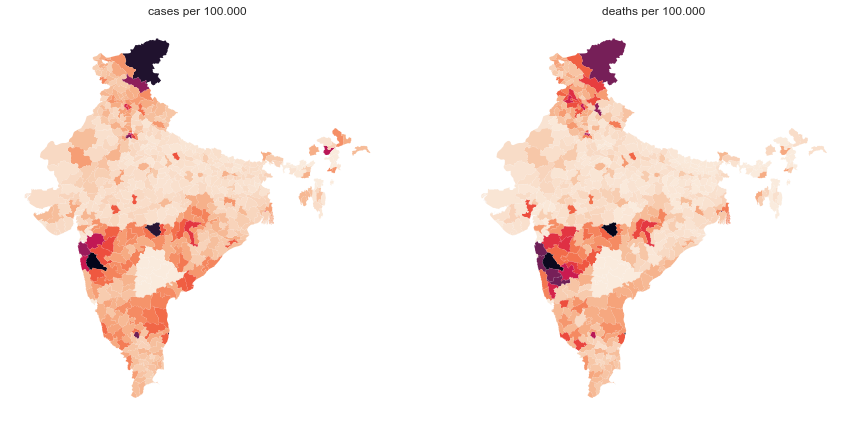

In [290]:
f, axs = plt.subplots(1,2, figsize=(15,15))
axs = axs.flatten()
 
for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='rocket_r', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [304]:
india_joined[['Urban population share',
             'average_age',
             'Literacy %',
             'slum share',
             'over_holi cases per 100.000',
             'over_holi deaths per 100.000'] ]
india_joined = india_joined.dropna()
india_joined['Literacy %'] = india_joined['Literacy']/india_joined['population_x']*100

,Urban population share,average_age,Literacy %,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
0,0.120329,23.130876,50.514388,0.023525,30.562277,0.114896
1,0.129901,22.392261,44.530843,0.049899,70.713570,0.398013
2,0.342138,29.451669,70.246541,0.058155,656.992816,0.749137
3,0.116035,24.916550,61.246289,0.000000,38.351728,0.000000
4,0.081013,23.933174,54.887749,0.000000,9.856659,0.419432
...,...,...,...,...,...,...
556,0.823259,32.183590,82.803653,0.013040,44.483082,0.160396
557,0.173151,28.769908,60.902762,0.031931,29.001031,0.000000
558,0.227876,28.080297,63.195676,0.013859,49.685899,0.000000
559,0.757347,32.493332,76.225353,0.075775,175.272444,0.318099


TypeError: '<' not supported between instances of 'str' and 'int'

In [307]:
#india_joined['Literacy %'] = india_joined['Literacy']/india_joined['population_x']*100

columns_to_plot
km_list1 = ['Urban population share',
             'average_age',
             'Literacy %',
             'slum share',
             'over_holi cases per 100.000',
             'over_holi deaths per 100.000' 
             ]

india_joined[km_list1]
india_joined[columns_to_plot]
india_joined.keys()

['Urban population share',
 'average_age',
 'slum share',
 'over_holi cases per 100.000',
 'over_holi deaths per 100.000']

,Urban population share,average_age,Literacy %,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
21,0.069562,26.424415,62.387686,0.000000,65.115204,0.385297
22,0.057137,30.090952,76.329984,0.001318,122.907803,1.854213
23,0.000000,30.125776,69.208592,0.000000,576.606260,0.000000
24,0.094521,27.797526,70.260309,0.001975,69.193406,0.456722
25,0.062651,29.145014,72.390843,0.004739,71.916037,1.100245
...,...,...,...,...,...,...
556,0.823259,32.183590,82.803653,0.013040,44.483082,0.160396
557,0.173151,28.769908,60.902762,0.031931,29.001031,0.000000
558,0.227876,28.080297,63.195676,0.013859,49.685899,0.000000
559,0.757347,32.493332,76.225353,0.075775,175.272444,0.318099


,Urban population share,average_age,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
21,0.069562,26.424415,0.000000,65.115204,0.385297
22,0.057137,30.090952,0.001318,122.907803,1.854213
23,0.000000,30.125776,0.000000,576.606260,0.000000
24,0.094521,27.797526,0.001975,69.193406,0.456722
25,0.062651,29.145014,0.004739,71.916037,1.100245
...,...,...,...,...,...
556,0.823259,32.183590,0.013040,44.483082,0.160396
557,0.173151,28.769908,0.031931,29.001031,0.000000
558,0.227876,28.080297,0.013859,49.685899,0.000000
559,0.757347,32.493332,0.075775,175.272444,0.318099


Index(['DISTRICT', 'ST_NM', 'ST_CEN_CD', 'DT_CEN_CD', 'censuscode', 'geometry',
       'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population_x', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000', 'cases per 100.000',
       'population density2', 'slum share', '6mil', 'over_holi cases_x',
       'over_holi deaths_x', 'population_y', 'over_holi cases per 100.000_x',
       'over_holi deaths per 100.000_x', 'Literacy %', 'kmeans_3', 'kmeans_5',
       'kmeans_7', 'kmeans_9', 'over_holi cases_y', 'over_holi deaths_y',
       'population_x', 'over_holi cases per 100.000_y',
       'over_holi deaths per 100.000_y', 'over_holi cases', 'over_holi deaths',
       'population_y', 'over_holi cases per 100.000',
       'over_holi deaths per 100.000'],
      dtype='object')

<AxesSubplot:>

Text(0.5, 1.0, 'Urban population share')

<AxesSubplot:>

Text(0.5, 1.0, 'average_age')

<AxesSubplot:>

Text(0.5, 1.0, 'Literacy %')

<AxesSubplot:>

Text(0.5, 1.0, 'slum share')

<AxesSubplot:>

Text(0.5, 1.0, 'over_holi cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'over_holi deaths per 100.000')

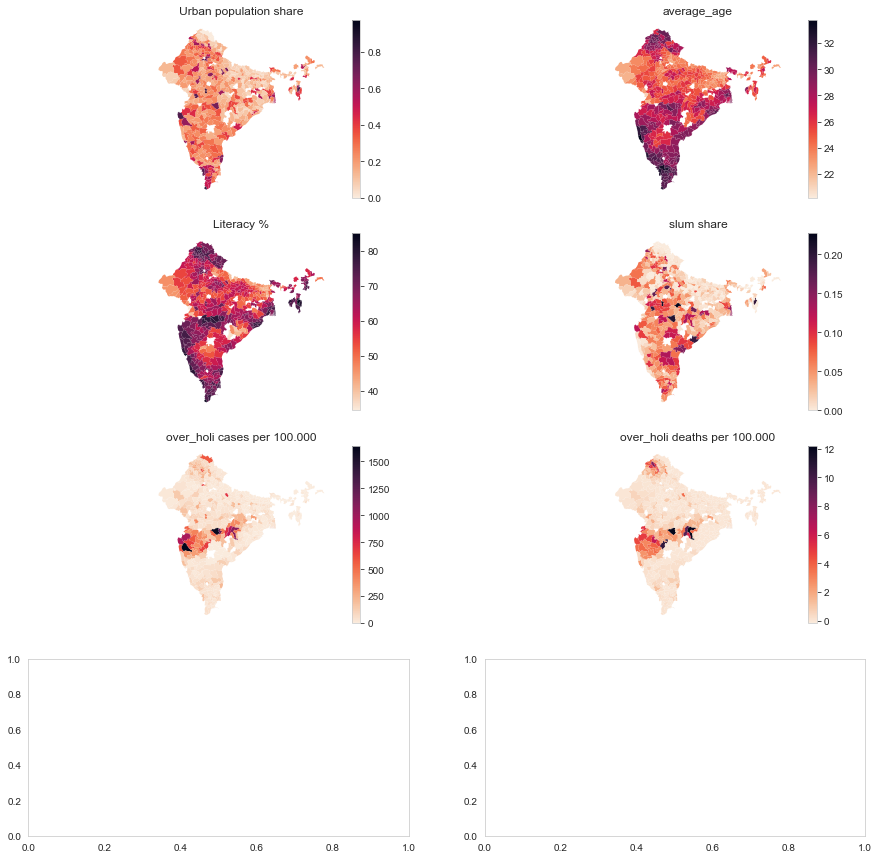

In [308]:


f, axs = plt.subplots(4,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(km_list1):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='rocket_r', alpha = 1, legend = True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [309]:
# Analysing how many clusters we need using the elbow method
# This method uses the point where the SSE does not decrease that much anaymore
# https://realpython.com/k-means-clustering-python/
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [310]:

sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(india_joined[km_list1])
    sse.append(kmeans.inertia_)
    
sse

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

[16851984.623884875,
 5518360.704636443,
 2616095.2340688393,
 1522020.8708459581,
 981084.6424999965,
 608093.8669634522,
 385745.26003170264,
 316935.05800431635,
 262581.9152477796,
 212641.53898326564]

([<matplotlib.axis.XTick at 0x263bd7f9820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

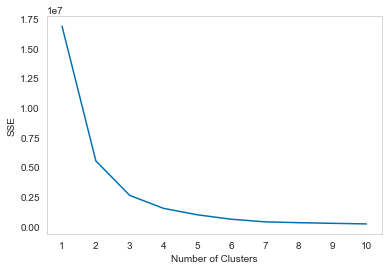

In [311]:
plt.style.use('seaborn-colorblind')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [312]:
# The graph is not very clear so we use a Kneelocater (knik)
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

We choose to use 3 clusters for our further analyses

In [313]:
#Setting up multiple clusters
kmeans_3 = cluster.KMeans(n_clusters=3)
np.random.seed(1234)
kmeanscls1 = kmeans_3.fit(india_joined[km_list1])

In [314]:
kmeans_5 = cluster.KMeans(n_clusters=5)
np.random.seed(1234)
kmeanscls2 = kmeans_5.fit(india_joined[km_list1])

In [315]:
kmeans_7 = cluster.KMeans(n_clusters=7)
np.random.seed(1234)
kmeanscls3 = kmeans_7.fit(india_joined[km_list1])

In [316]:
kmeans_9 = cluster.KMeans(n_clusters=9)
np.random.seed(1234)
kmeanscls4 = kmeans_9.fit(india_joined[km_list1])

In [317]:
india_joined['kmeans_3'] = kmeanscls1.labels_
india_joined['kmeans_5'] = kmeanscls2.labels_
india_joined['kmeans_7'] = kmeanscls3.labels_
india_joined['kmeans_9'] = kmeanscls4.labels_

C:\Users\danie\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\danie\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\danie\anaconda3\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [318]:
kmes = ['kmeans_3','kmeans_5','kmeans_7','kmeans_9']

In [319]:
kme_urb = india_joined[km_list1]
kme_urb

,Urban population share,average_age,Literacy %,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
21,0.069562,26.424415,62.387686,0.000000,65.115204,0.385297
22,0.057137,30.090952,76.329984,0.001318,122.907803,1.854213
23,0.000000,30.125776,69.208592,0.000000,576.606260,0.000000
24,0.094521,27.797526,70.260309,0.001975,69.193406,0.456722
25,0.062651,29.145014,72.390843,0.004739,71.916037,1.100245
...,...,...,...,...,...,...
556,0.823259,32.183590,82.803653,0.013040,44.483082,0.160396
557,0.173151,28.769908,60.902762,0.031931,29.001031,0.000000
558,0.227876,28.080297,63.195676,0.013859,49.685899,0.000000
559,0.757347,32.493332,76.225353,0.075775,175.272444,0.318099


In [320]:
kme_urb['kmeans_3'] = kmeanscls1.labels_
kme_urb

C:\Users\danie\AppData\Local\Temp/ipykernel_5140/934937021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kme_urb['kmeans_3'] = kmeanscls1.labels_


,Urban population share,average_age,Literacy %,slum share,over_holi cases per 100.000,over_holi deaths per 100.000,kmeans_3
21,0.069562,26.424415,62.387686,0.000000,65.115204,0.385297,1
22,0.057137,30.090952,76.329984,0.001318,122.907803,1.854213,1
23,0.000000,30.125776,69.208592,0.000000,576.606260,0.000000,2
24,0.094521,27.797526,70.260309,0.001975,69.193406,0.456722,1
25,0.062651,29.145014,72.390843,0.004739,71.916037,1.100245,1
...,...,...,...,...,...,...,...
556,0.823259,32.183590,82.803653,0.013040,44.483082,0.160396,1
557,0.173151,28.769908,60.902762,0.031931,29.001031,0.000000,1
558,0.227876,28.080297,63.195676,0.013859,49.685899,0.000000,1
559,0.757347,32.493332,76.225353,0.075775,175.272444,0.318099,1


In [321]:
size_of_clusters = kme_urb.groupby('kmeans_3').size()
size_of_clusters

kmeans_3
0      7
1    429
2     40
dtype: int64

In [322]:
kme_urb = kme_urb.set_index('kmeans_3')
kme_urb.head()

,Urban population share,average_age,Literacy %,slum share,over_holi cases per 100.000,over_holi deaths per 100.000
kmeans_3,,,,,,
1,0.069562,26.424415,62.387686,0.000000,65.115204,0.385297
1,0.057137,30.090952,76.329984,0.001318,122.907803,1.854213
2,0.000000,30.125776,69.208592,0.000000,576.606260,0.000000
1,0.094521,27.797526,70.260309,0.001975,69.193406,0.456722
1,0.062651,29.145014,72.390843,0.004739,71.916037,1.100245


In [323]:
kme_urb = kme_urb.stack()
kme_urb.head(100)

kmeans_3                              
1         Urban population share           0.069562
          average_age                     26.424415
          Literacy %                      62.387686
          slum share                       0.000000
          over_holi cases per 100.000     65.115204
                                            ...    
          over_holi deaths per 100.000     8.193492
          Urban population share           0.204824
          average_age                     30.066249
          Literacy %                      71.607356
          slum share                       0.000000
Length: 100, dtype: float64

In [334]:
kme_urb = kme_urb.reset_index()

ValueError: cannot insert level_0, already exists

In [325]:
kme_urb = kme_urb.rename({'level_1': 'Characteristics', 0:'Values'}, axis =1)
kme_urb.head()

,kmeans_3,Characteristics,Values
0,1,Urban population share,0.069562
1,1,average_age,26.424415
2,1,Literacy %,62.387686
3,1,slum share,0.000000
4,1,over_holi cases per 100.000,65.115204


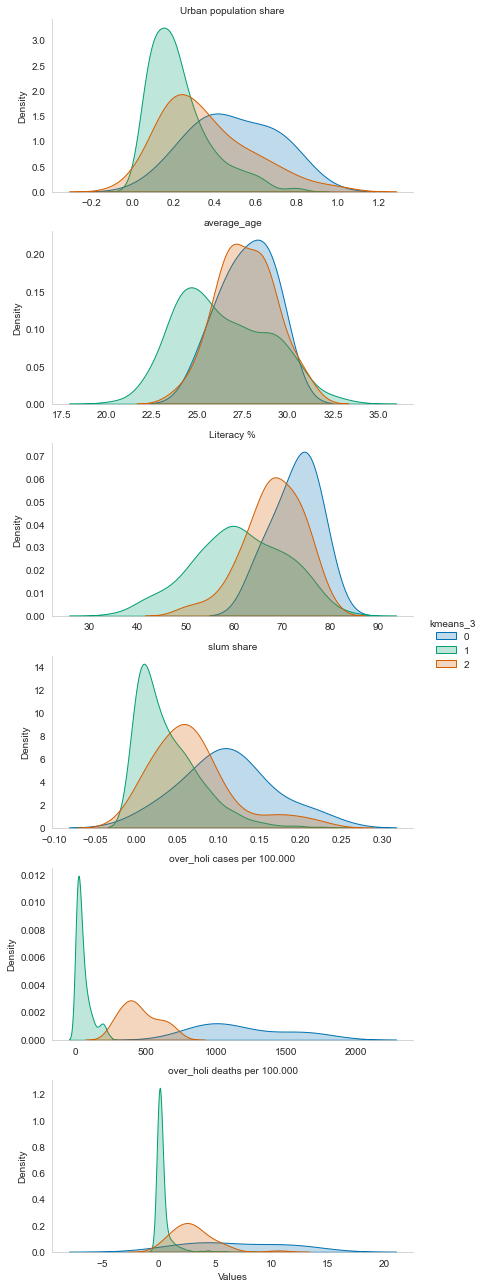

In [326]:
sns.set_style("whitegrid", {'axes.grid' : False})
facets = sns.FacetGrid(data=kme_urb, row='Characteristics', hue='kmeans_3', \
                  sharey=False, sharex=False, aspect=2)
_ = facets.map(sns.kdeplot, 'Values', shade= True).add_legend()
facets.tight_layout()
facets.set_titles(col_template = '{col_name}', row_template = '{row_name}')
facets.savefig('bumps.png')

<AxesSubplot:>

Text(0.5, 1.0, 'kmeans_3')

<AxesSubplot:>

Text(0.5, 1.0, 'kmeans_5')

<AxesSubplot:>

Text(0.5, 1.0, 'kmeans_7')

<AxesSubplot:>

Text(0.5, 1.0, 'kmeans_9')

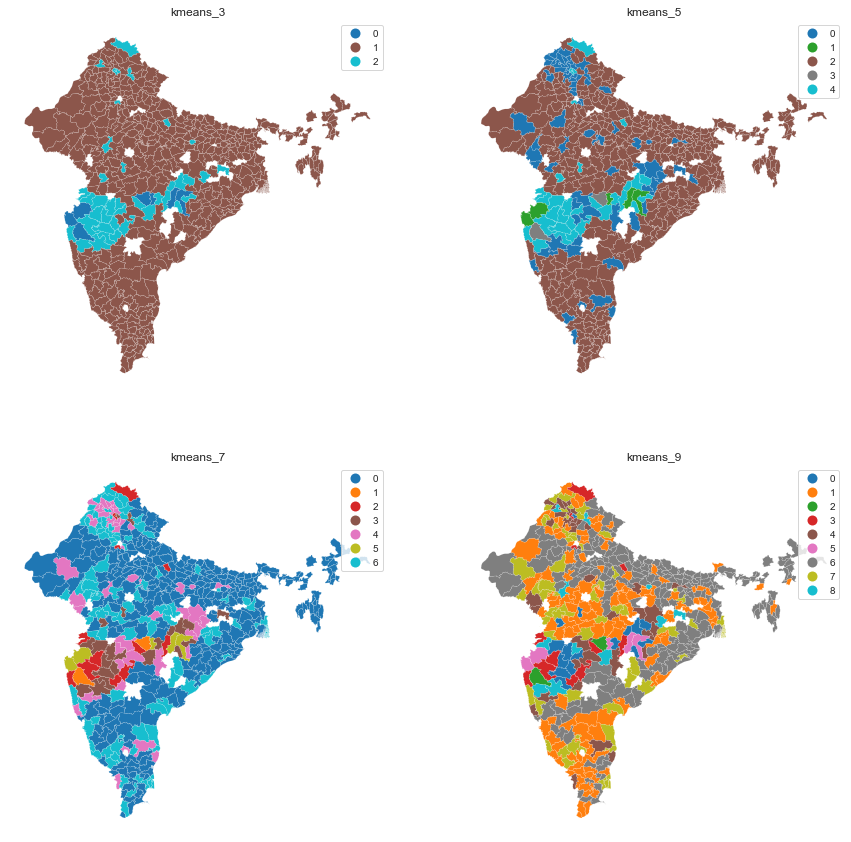

In [327]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(kmes):
    ax = axs[i]
    india_joined.plot(column=col, categorical=True, legend=True, linewidth=0.1, ax=ax, )
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()


In [328]:
for i, col in enumerate(kmes):
    print(col)
    print(i)

kmeans_3
0
kmeans_5
1
kmeans_7
2
kmeans_9
3


[(0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.3712, 0.33999999999999997, 0.86)]

<AxesSubplot:>

Text(0.5, 1.0, 'Three Clusters')

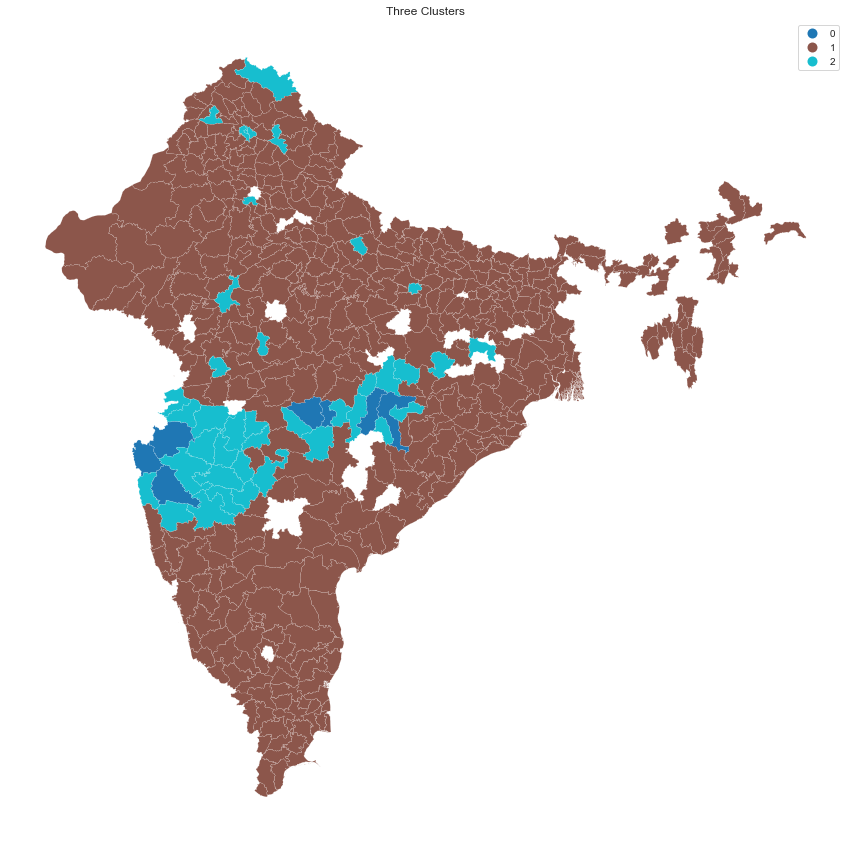

In [329]:
f, ax = plt.subplots(1,1, figsize=(15,15))
sns.color_palette("hls", 3)
india_joined.plot(column='kmeans_3', categorical=True, legend=True, linewidth=0.1, ax=ax, )
ax.set_axis_off()
ax.set_title('Three Clusters', fontsize =12)
plt.show()